## The scikit-learn Notebook by Walter Regan

***

### This notebook will contain a clear and concise overview of the scikit-learn Python library, demonstrating at least three interesting scikit-learn algorithms of your choice. You may choose to have an overall spread of examples across the library or pick a particular part that you find interesting. <b />
**Edit into first person present tense when I decide on which examples to do.**

In [8]:
# Efficient numerical arrays
import numpy as np

# plotting
import matplotlib.pyplot as plt

In [2]:
# change default style sheet
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

# change default figure size
plt.rcParams['figure.figsize'] = [10, 5]

<b />

### numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***

In [3]:
 # mean and standard deviation
mu, sigma = 0, 0.1

# draw random samples from a normal (Gaussian) distribution
s = np.random.normal(mu, sigma, 1000)

In [4]:
# verify the mean and the variance
abs(mu - np.mean(s))

0.0008101983223560143

In [5]:
abs(sigma - np.std(s, ddof=1))

0.002190571315690462

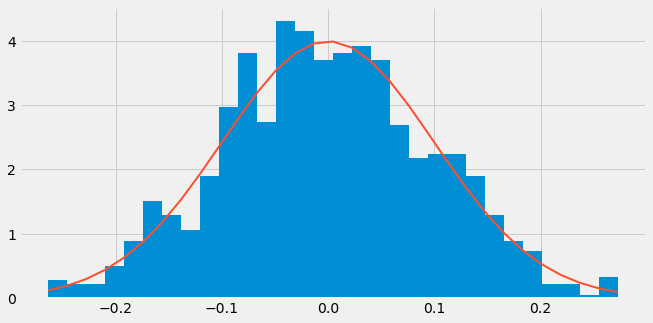

In [6]:
# Verify the mean and the variance
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2))
plt.plot(bins, f, linewidth=2)
plt.show()

## End Section 1
***
***

## scikit-learn Tutorials Examples
https://scikit-learn.org/stable/tutorial/index.html
***

## An introduction to machine learning with scikit-learn

### Loading an example dataset

In [52]:
#import sklearn.datasets as datasets
from sklearn import datasets

In [53]:
iris = datasets.load_iris()

In [54]:
digits = datasets.load_digits()

In [55]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [56]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [57]:
print(digits.target)

[0 1 2 ... 8 9 8]


### Learning and predicting

In [58]:
# estimator class
from sklearn import svm
#import sklearn.svm as svm

In [59]:
# clf - for classifier, here is an estimator instance
clf = svm.SVC(gamma=0.001, C=100)

__Choosing the parameters of the mode__

In [60]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100, gamma=0.001)

In [62]:
# predict new values
clf.predict(digits.data[-1:])

array([8])

### Conventions
scikit-learn estimators follow certain rules to make their behavior more predictive. These are described in more detail in the Glossary of Common Terms and API Elements.
https://scikit-learn.org/stable/glossary.html#glossary

__Type Casting__

In [63]:
import numpy as np

In [64]:
from sklearn import random_projection

In [65]:
rng = np.random.RandomState(0)

In [66]:
X = rng.rand(10, 2000)

In [67]:
X = np.array(X, dtype='float32')

In [68]:
X.dtype

dtype('float32')

In [69]:
transformer = random_projection.GaussianRandomProjection()

In [70]:
X_new = transformer.fit_transform(X)

In [71]:
X_new.dtype

dtype('float64')

In [74]:
#from sklearn import datasets

In [75]:
from sklearn.svm import SVC

In [ ]:
#iris = datasets.load_iris()

In [66]:
#clf = SVC()

In [76]:
clf = svm.SVC()

In [77]:
clf.fit(iris.data, iris.target)

SVC()

In [78]:
# returns an integer arrayas iris.target an integer array was used to fit
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [79]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

In [80]:
# returns a string, as iris.target_names was used for fitting
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

__Refitting and updating parameters__

In [ ]:
#import numpy as np

In [ ]:
#from sklearn.datasets import load_iris

In [ ]:
#from sklearn.svm import SVC

In [77]:
X, y = datasets.load_iris(return_X_y= True)

In [79]:
clf= svm.SVC()

In [81]:
# change default kernel 'rbf' to linear
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [82]:
# make prediction
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [83]:
# change kernel back to 'rbf' to refit the estimator
clf.set_params(kernel='rbf').fit(X, y)

SVC()

In [84]:
# make second prediction
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

__Multiclass vs. multilabel fitting__

In [85]:
#from sklearn.svm import SVC

In [89]:
#from sklearn.multiclass import OneVsRestClassifier
import sklearn.multiclass as multiclass
OneVsRestClassifier = multiclass.OneVsRestClassifier

In [90]:
from sklearn.preprocessing import LabelBinarizer

In [91]:
 X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]

In [92]:
y = [0, 0, 1, 1, 2]

In [93]:
classif = OneVsRestClassifier(estimator=SVC(random_state=0))

In [94]:
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [95]:
y = LabelBinarizer().fit_transform(y)

In [96]:
classif.fit(X,y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [110]:
from sklearn.preprocessing import MultiLabelBinarizer
#import sklearn.preprocessing as preprocessing
#MultiLabelBinarizer = preprocessing.MultiLabelBinarizer

In [111]:
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]

In [112]:
y = MultiLabelBinarizer().fit_transform(y)

In [113]:
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

### End - Introduction to machine learning with scikit-learn
***

## A tutorial on statistical-learning for scientific data processing

#### Statistical learning: the setting and the estimator object in scikit-learn

__Datasets :__ ___A simple example shipped with scikit-learn: iris dataset___

In [81]:
from sklearn import datasets

In [82]:
iris = datasets.load_iris()

In [83]:
data = iris.data

In [84]:
data.shape

(150, 4)

__Datasets:__ ___An example of reshaping data would be the digits dataset___

The digits dataset is made of 1797 8x8 images of hand-written digits

In [85]:
digits = datasets.load_digits()

In [86]:
digits.images.shape

(1797, 8, 8)

In [87]:
import matplotlib.pyplot as plt

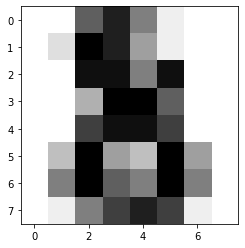

In [97]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

To use this dataset with scikit-learn, we transform each 8x8 image into a feature vector of length 64

In [89]:
data = digits.images.reshape((digits.images.shape[0], -1))

### Estimators objects

__Fitting data__

In [100]:
estimator.fit(data)

NameError: name 'estimator' is not defined

In [46]:
estimator = Estimator(param1=1, param2=2)

NameError: name 'Estimator' is not defined

In [31]:
estimator.param1

NameError: name 'estimator' is not defined

In [94]:
estimator.estimated_param_ 

NameError: name 'estimator' is not defined

### End Statistical learning: the setting and the estimator object in scikit-learn
***

***
### Supervised learning: predicting an output variable from high-dimensional observations
***

## NumPy Documentation

[Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

***

__Some Basics__

In [1]:
import numpy as np

In [11]:
# range function generator
range(5)

range(0, 5)

In [10]:
# displays a list exclusive of 5
list(range(5))

[0, 1, 2, 3, 4]

In [12]:
# lists start(inclusive) to end(exclusive) with a step of 2
list(range(1, 10, 2))

[1, 3, 5, 7, 9]

In [42]:
# wraps range in a numpy array
a = np.arange(1, 10, 2)
a

array([1, 3, 5, 7, 9])

In [20]:
# displays type of elements in array
a.dtype

dtype('int32')

In [21]:
a.dtype.name

'int32'

In [44]:
# pass floating point numbers and fractional steps
b = np.arange(1.5, 4.21, 0.02)
b

array([1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 ,
       1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92,
       1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14,
       2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36,
       2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58,
       2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 ,
       2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02,
       3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22, 3.24,
       3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44, 3.46,
       3.48, 3.5 , 3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64, 3.66, 3.68,
       3.7 , 3.72, 3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 ,
       3.92, 3.94, 3.96, 3.98, 4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12,
       4.14, 4.16, 4.18, 4.2 ])

In [45]:
# displays type of elements in array
b.dtype

dtype('float64')

In [25]:
b.dtype.name

'float64'

In [46]:
# pass floating point numbers with integer steps
c = np.arange(1.5, 10.21, 2)
c

array([1.5, 3.5, 5.5, 7.5, 9.5])

In [47]:
# type of array elements is float regardless of step type being an integer
c.dtype

dtype('float64')

In [48]:
# gives a tuple of array dimensions and can be used to change the dimensions of an array.
c.shape

(5,)

In [51]:
# reshape tool gives a new shape to an array without changing its data.
# it creates a new array and does not modify the original array itself.

a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [52]:
a.shape

(3, 5)

In [53]:
# displays 1 column, -1 tell numpy to figure out number of rows
a.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

In [58]:
# ndim property is used to get an int representing the number of axes / array dimensions
a.ndim

2

In [55]:
# c is 1 dimensional
c.ndim

1

In [59]:
# returns the size (in bytes) of each element array
a.itemsize

4

In [62]:
# number of elements in array
# c elements are integer numbers

a.size

15

In [63]:
# returns the size (in bytes) of each element array
# c elements are floating point numbers

c.itemsize

8

In [64]:
# identifies the type
type(a)

numpy.ndarray

In [65]:
type(c)

numpy.ndarray

In [67]:
d = np.array([6, 7, 8])
d

array([6, 7, 8])

In [68]:
type(d)

numpy.ndarray

In [69]:
num = 9
num

9

In [70]:
# displays num as an integer type
type(num)

int

In [72]:
# list between 0 and 10 with increments of 0.1
x = np.arange(0.0, 10.0, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [74]:
# plot squared function
y = x**2
y

array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
       3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
       1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
       3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
       5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
       9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
       1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
       1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
       2.304e+01, 2.401e+01, 2.500e+01, 2.601e+01, 2.704e+01, 2.809e+01,
       2.916e+01, 3.025e+01, 3.136e+01, 3.249e+01, 3.364e+01, 3.481e+01,
       3.600e+01, 3.721e+01, 3.844e+01, 3.969e+01, 4.096e+01, 4.225e+01,
       4.356e+01, 4.489e+01, 4.624e+01, 4.761e+01, 4.900e+01, 5.041e+01,
       5.184e+01, 5.329e+01, 5.476e+01, 5.625e+01, 5.776e+01, 5.929e+01,
       6.084e+01, 6.241e+01, 6.400e+01, 6.561e+01, 

In [79]:
# creates numeric sequences, similar to the NumPy arange function,
# in that it creates sequences of evenly spaced numbers structured as a NumPy array

#np.linspace(0.0, 10.0, 100) # at 100
np.linspace(0.0, 10.0, 101) # at 101

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [81]:
# create an all zero's array - takes a single parameter, returns floating point numbers
np.zeros(3)

array([0., 0., 0.])

In [82]:
# pass tuple to create multi-dimensional array
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [85]:
# create an all 1's array - takes a single parameter
np.ones(3)

array([1., 1., 1.])

In [90]:
# create an all 1's array - takes a single parameter
j = np.ones((3, 5))
j

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [91]:
# displays floating point
j.dtype

dtype('float64')

In [92]:
# idenity matrix
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [95]:
i.dtype

dtype('float64')

In [97]:
# cast i to integer array type
i.astype('int64')

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

***
### Array Creation
__There are several ways to create arrays__

Arrays can be created from a regular Python list or tuple using the <font color='red'>array</font> function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [111]:
# create array using array funtion, provides a single sequence within the square brackets 
x = np.array([2, 3, 4])
x

array([2, 3, 4])

In [107]:
x.dtype

dtype('int32')

In [108]:
x.astype('int64')

array([2, 3, 4], dtype=int64)

In [109]:
y = np.array([1.2, 3.5, 5.1])
y

array([1.2, 3.5, 5.1])

In [110]:
y.dtype

dtype('float64')

A frequent error consists in calling <font color='red'>array</font> with multiple arguments, rather than providing a single sequence as an argument.

In [114]:
# wrong
#a = np.array(1, 2, 3, 4) # commented out / uncomment to see error

<font color='red'>array</font> transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [116]:
# sequences of sequences into 2-dimensional array
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [117]:
# array is deemed a float type
b.dtype

dtype('float64')

The type of the array can also be explicitly specified at creation time

In [118]:
# complex numbers
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [119]:
# display type
c.dtype

dtype('complex128')

When the elements of an array are originally unknown, but its size is known. Can use one of several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

In [125]:
# the function zeros creates an array full of zeros
np.zeros((3, 4)) # rows, columns

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [126]:
# the function ones creates an array full of ones - can specify dtype on creation
np.ones((2, 3, 4), dtype=np.int16) # 2 arrays, rows, columns

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [127]:
# the function empty creates an array whose initial content is random
# and depends on the state of the memory
np.empty((2, 3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The <span style=color='red'>arange</span> function creates sequences of numbers which is analogous to the Python built-in <font color='red'>range</font>, but returns an array.

In [130]:
# pass start, end, and step values respectively - end is exclusive
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [132]:
# pass start, end, and floating step
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When using <font color='red'>arange</font> with floating point numbers, it is not possible to predict the number of elements obtained, due to the finite floating point precision. Better to use the function <font color='red'>linspace</font> as it takes the number of elements that we want, instead of the step.

In [136]:
# displays 9 number from 0 to 2
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [151]:
from numpy import pi

# create array with many elements - useful to evaluate function at lots of points
x = np.linspace(0, 2 * pi, 10) # at 10 elements
#x = np.linspace(0, 2 * pi, 100) # at 100 elements
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [152]:
# evaluate function at many different points
f = np.sin(x)
f

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

***
## Printing Arrays

### End of NumPy Quickstart

***

## NumPy Tutorial: Your First Steps Into Data Science in Python
[Real Python](https://realpython.com/numpy-tutorial/)

In [180]:
CURVE_CENTER = 80

In [181]:
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

In [182]:
def curve(grades):
    average = grades.mean()
    change = CURVE_CENTER - average
    new_grades = grades + change
    return np.clip(new_grades, grades, 100)

In [183]:
curve(grades)

array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])